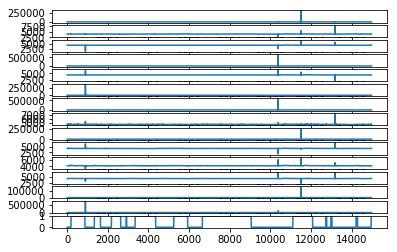

In [2]:
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
data = read_csv('EEG_Eye_State.csv', header=None)
# retrieve data as numpy array
values = data.values
# create a subplot for each time series
pyplot.figure()
for i in range(values.shape[1]):
	pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

In [3]:
from pandas import read_csv
from numpy import mean
from numpy import std
from numpy import delete
from numpy import savetxt
# load the dataset.
data = read_csv('EEG_Eye_State.csv', header=None)
values = data.values
# step over each EEG column
for i in range(values.shape[1] - 1):
    # calculate column mean and standard deviation
    data_mean, data_std = mean(values[:,i]), std(values[:,i])
	# define outlier bounds
	cut_off = data_std * 4
	lower, upper = data_mean - cut_off, data_mean + cut_off
	# remove too small
	too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
	values = delete(values, too_small, 0)
	print('>deleted %d rows' % len(too_small))
	# remove too large
	too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
	values = delete(values, too_large, 0)
	print('>deleted %d rows' % len(too_large))
# save the results to a new file
savetxt('EEG_Eye_State_no_outliers.csv', values, delimiter=',')

>deleted 0 rows
>deleted 1 rows
>deleted 2 rows
>deleted 1 rows
>deleted 0 rows
>deleted 142 rows
>deleted 0 rows
>deleted 48 rows
>deleted 0 rows
>deleted 153 rows
>deleted 0 rows
>deleted 43 rows
>deleted 0 rows
>deleted 0 rows
>deleted 0 rows
>deleted 15 rows
>deleted 0 rows
>deleted 5 rows
>deleted 10 rows
>deleted 0 rows
>deleted 21 rows
>deleted 53 rows
>deleted 0 rows
>deleted 12 rows
>deleted 58 rows
>deleted 53 rows
>deleted 0 rows
>deleted 59 rows


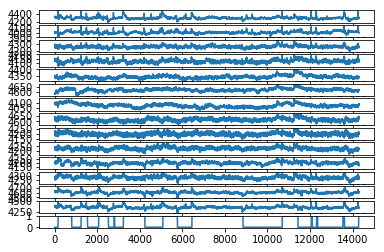

In [5]:
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
data = read_csv('EEG_Eye_State_no_outliers.csv', header=None)
# retrieve data as numpy array
values = data.values
# create a subplot for each time series
pyplot.figure()
for i in range(values.shape[1]):
    pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

In [6]:
# knn for predicting eye state
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
# load the dataset
data = read_csv('EEG_Eye_State_no_outliers.csv', header=None)
values = data.values
# evaluate knn using 10-fold cross-validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=1)
for train_ix, test_ix in kfold.split(values):
    # define train/test X/y
    # trainX, trainy = values[train_ix, :-1], values[train_ix, -1]
    # testX, testy = values[test_ix, :-1], values[test_ix, -1]
    #  define model
    model = KNeighborsClassifier(n_neighbors=3)
	# fit model on train set
	model.fit(trainX, trainy)
	# forecast test set
	yhat = model.predict(testX)
	# evaluate predictions
	score = accuracy_score(testy, yhat)
	# store
	scores.append(score)
	print('>%.3f' % score)
# calculate mean score across each run
print('Final Score: %.3f' % (mean(scores)))

>0.970
>0.975


>0.978
>0.977


>0.973
>0.979


>0.978
>0.976


>0.974
>0.969
Final Score: 0.975


In [7]:
# knn for predicting eye state
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# load the dataset
data = read_csv('EEG_Eye_State_no_outliers.csv', header=None)
values = data.values
# split data into inputs and outputs
X, y = values[:, :-1], values[:, -1]
# split the dataset
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=1)
# define model
model = KNeighborsClassifier(n_neighbors=3)
# fit model on train set
model.fit(trainX, trainy)
# forecast test set
yhat = model.predict(testX)
# evaluate predictions
score = accuracy_score(testy, yhat)
print(score)

0.9699510831586303


In [9]:
# knn for predicting eye state
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# load the dataset
data = read_csv('EEG_Eye_State_no_outliers.csv', header=None)
values = data.values
# split data into inputs and outputs
X, y = values[:, :-1], values[:, -1]
# split the dataset
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=1)
# define model
model = KNeighborsClassifier(n_neighbors=3)
# fit model on train set
model.fit(trainX, trainy)
# forecast test set
yhat = model.predict(testX)
# evaluate predictions
score = accuracy_score(testy, yhat)
print(score)

0.5269042627533194


In [10]:
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from numpy import flip
# load the dataset
data = read_csv('EEG_Eye_State_no_outliers.csv', header=None)
values = data.values
# reverse order of rows
values = flip(values, 0)
# split data into inputs and outputs
X, y = values[:, :-1], values[:, -1]
# split the dataset
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=1)
# define model
model = KNeighborsClassifier(n_neighbors=3)
# fit model on train set
model.fit(trainX, trainy)
# forecast test set
yhat = model.predict(testX)
# evaluate predictions
score = accuracy_score(testy, yhat)
print(score)

0.5290006988120196


In [1]:
# knn for predicting eye state
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from numpy import array
# load the dataset
data = read_csv('EEG_Eye_State_no_outliers.csv', header=None)
values = data.values
# split data into inputs and outputs
X, y = values[:, :-1], values[:, -1]
# split the dataset
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=1)
# walk-forward validation
historyX, historyy = [x for x in trainX], [x for x in trainy]
predictions = list()
for i in range(len(testy)):
    # define model
    model = KNeighborsClassifier(n_neighbors=3)
    # fit model on train set
    model.fit(array(historyX), array(historyy))
    # forecast the next time step
    yhat = model.predict([testX[i, :]])[0]
    # store prediction
    predictions.append(yhat)
    # add real observation to history
    historyX.append(testX[i, :])
    historyy.append(testy[i])
# evaluate predictions
score = accuracy_score(testy, predictions)
print(score)

0.9531795946890287


In [2]:
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from numpy import array
# load the dataset
data = read_csv('EEG_Eye_State_no_outliers.csv', header=None)
values = data.values
# split data into inputs and outputs
X, y = values[:, :-1], values[:, -1]
# split the dataset
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=1)
# walk-forward validation
historyX, historyy = [x for x in trainX], [x for x in trainy]
predictions = list()
for i in range(len(testy)):
    # define model
    model = KNeighborsClassifier(n_neighbors=3)
    # fit model on a small subset of the train set
    tmpX, tmpy = array(historyX)[-10:,:], array(historyy)[-10:]
    model.fit(tmpX, tmpy)
    # forecast the next time step
    yhat = model.predict([testX[i, :]])[0]
    # store prediction
    predictions.append(yhat)
    # add real observation to history
    historyX.append(testX[i, :])
    historyy.append(testy[i])
# evaluate predictions
score = accuracy_score(testy, predictions)
print(score)

0.9923130677847659
